# Project 1 - Write a Data Science Blog Post
Done By:
 - Mohammed Alali
    
# Business Understanding

The following questions will elborate to get more details about user on Stackoverflow in 2017:

-  How many developers are in each formal education?
-  How is the StackOverflow Satisfaction for developers who are non-IT graduates?
-  What are the most professionals for the developers?

In [1]:
# Import libraries:
import pandas as pd
import matplotlib.pyplot as plt
import math
pd.set_option('display.max_columns', None)
%matplotlib inline


# Data Understanding

In this section of the report, the data loaded and some insights is found.


In [2]:
# Read in the dataset
df = pd.read_csv('survey_results_public.csv')

In [3]:
# Show the first five rows of data
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

In [4]:
# Find the number of rows and columns in the dataset
df.shape

(51392, 154)

This dataset contains almost 51.4K rows and 154 columns.

In [5]:
# Display the data types of each feature
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Data columns (total 154 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Respondent                        int64  
 1   Professional                      object 
 2   ProgramHobby                      object 
 3   Country                           object 
 4   University                        object 
 5   EmploymentStatus                  object 
 6   FormalEducation                   object 
 7   MajorUndergrad                    object 
 8   HomeRemote                        object 
 9   CompanySize                       object 
 10  CompanyType                       object 
 11  YearsProgram                      object 
 12  YearsCodedJob                     object 
 13  YearsCodedJobPast                 object 
 14  DeveloperType                     object 
 15  WebDeveloperType                  object 
 16  MobileDeveloperType               objec

In [6]:
# Display the summary statistics of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Respondent,51392.0,25696.500000,14835.736854,1.0,12848.750000,25696.500000,38544.250000,51392.0
CareerSatisfaction,42695.0,7.300574,1.955444,0.0,6.000000,8.000000,9.000000,10.0
JobSatisfaction,40376.0,6.957078,2.167652,0.0,6.000000,7.000000,8.000000,10.0
HoursPerWeek,20600.0,3.952282,7.564722,0.0,1.000000,1.000000,4.000000,40.0
StackOverflowSatisfaction,36592.0,8.429875,1.390635,0.0,8.000000,9.000000,10.000000,10.0
Salary,12891.0,56298.480641,39880.905277,0.0,26440.371839,50000.000000,80000.000000,197000.0
ExpectedSalary,2566.0,33142.220468,30162.988829,0.0,4490.492484,29364.263691,50403.225806,187500.0


# Data Preparation:
This section will be used to prepare and clean the data for further analysis.

In [7]:
# How many missing values are in the dataset? 
null_df = (df.isnull().sum()/df.shape[0]).to_frame(name='Null Percentage')
# Display the columns which have 50 per cent or more of a missing value
null_df[null_df['Null Percentage'] > 0.5].sort_values(by='Null Percentage',ascending=False)

,Null Percentage
ExCoder10Years,0.982157
ExCoderNotForMe,0.982079
ExCoderWillNotCode,0.982059
ExCoderReturn,0.982040
ExCoderBalance,0.982040
ExCoderBelonged,0.981943
ExCoderActive,0.981904
ExCoderSkills,0.981807
YearsCodedJobPast,0.981048
MobileDeveloperType,0.969781


As a result, these columns have more than 50 per cent of  missing values more, so these will be droped. 

In [8]:
# List of columns
col_list = null_df[null_df['Null Percentage'] > 0.5].index.to_list()

# Drop these columns from the dataset
df_without_null = df.drop(col_list,axis=1)

# Get the shape after removing columns
df_without_null.shape

(51392, 101)

The shape of dataset has been changed, so the remaining columns will be handled based on selection to answer the questions.

In [9]:
# Display the list of columns after removing null columns
df_without_null.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Data columns (total 101 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Respondent                        int64  
 1   Professional                      object 
 2   ProgramHobby                      object 
 3   Country                           object 
 4   University                        object 
 5   EmploymentStatus                  object 
 6   FormalEducation                   object 
 7   MajorUndergrad                    object 
 8   HomeRemote                        object 
 9   CompanySize                       object 
 10  CompanyType                       object 
 11  YearsProgram                      object 
 12  YearsCodedJob                     object 
 13  DeveloperType                     object 
 14  CareerSatisfaction                float64
 15  JobSatisfaction                   float64
 16  PronounceGIF                      objec

In [10]:
# How many diplicated rows?
df_without_null.duplicated().sum()

0

There is no duplicated rows.

In [11]:
# Define the selected columns for answering questions
selected_col = ['Professional','FormalEducation','Country','MajorUndergrad','StackOverflowSatisfaction','JobSatisfaction']

# Take the copy of dataset for the rest cleaning process 
new_df = df_without_null[selected_col].copy()

In [12]:
# Display the first five rows of selected columns
new_df.head()

,Professional,FormalEducation,Country,MajorUndergrad,StackOverflowSatisfaction,JobSatisfaction
0,Student,Secondary school,United States,NaN,9.0,NaN
1,Student,Some college/university study without earning ...,United Kingdom,Computer science or software engineering,8.0,NaN
2,Professional developer,Bachelor's degree,United Kingdom,Computer science or software engineering,8.0,9.0
3,Professional non-developer who sometimes write...,Doctoral degree,United States,A non-computer-focused engineering discipline,10.0,3.0
4,Professional developer,Master's degree,Switzerland,Computer science or software engineering,NaN,8.0


In [13]:
# Show the precentage of missing values after selecting the columns
new_df.isnull().sum()/new_df.shape[0]

Professional                 0.000000
FormalEducation              0.000000
Country                      0.000000
MajorUndergrad               0.166388
StackOverflowSatisfaction    0.287983
JobSatisfaction              0.214352
dtype: float64

The `MajorUndergrad`,`StackOverflowSatisfaction` and `JobSatisfaction` have a missing values.

In [14]:
# Show some records of missing value in MajorUndergrad
new_df[new_df.MajorUndergrad.isnull()].head()

,Professional,FormalEducation,Country,MajorUndergrad,StackOverflowSatisfaction,JobSatisfaction
0,Student,Secondary school,United States,NaN,9.0,NaN
5,Student,Secondary school,New Zealand,NaN,6.0,NaN
15,Professional developer,Primary/elementary school,United States,NaN,9.0,8.0
16,Professional developer,Secondary school,United Kingdom,NaN,7.0,NaN
23,Professional developer,Secondary school,Italy,NaN,8.0,8.0


In [15]:
# Display the formal education of the missing values in MajorUndergrad
new_df[new_df.MajorUndergrad.isnull()]['FormalEducation'].value_counts()

Secondary school                                                     5900
I prefer not to answer                                               1107
Primary/elementary school                                            1047
I never completed any formal education                                426
Some college/university study without earning a bachelor's degree      27
Bachelor's degree                                                      25
Master's degree                                                        16
Professional degree                                                     3
Name: FormalEducation, dtype: int64

In [16]:
# Relpace the missing values with None since the most of formal education is rlated to school
new_df.MajorUndergrad.fillna('None',inplace=True)

In [17]:
# Show some records of missing value in StackOverflowSatisfaction
new_df[new_df.StackOverflowSatisfaction.isnull()].head()

,Professional,FormalEducation,Country,MajorUndergrad,StackOverflowSatisfaction,JobSatisfaction
4,Professional developer,Master's degree,Switzerland,Computer science or software engineering,NaN,8.0
11,Professional developer,Bachelor's degree,Canada,Computer science or software engineering,NaN,6.0
18,Professional developer,Bachelor's degree,United States,Computer science or software engineering,NaN,3.0
20,Professional developer,Bachelor's degree,Brazil,Computer science or software engineering,NaN,7.0
24,Professional developer,Master's degree,Belgium,Computer science or software engineering,NaN,9.0


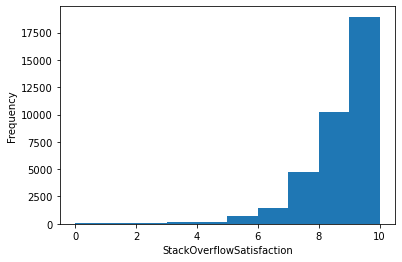

In [18]:
# Display the histogram of StackOverflowSatisfaction
new_df['StackOverflowSatisfaction'].plot(kind='hist',legend=False);

# Add x-label to the plot
plt.xlabel('StackOverflowSatisfaction');

The distribution of `StackOverflowSatisfaction` is negatively skewed, so the missing values will be replaced with the mean.

In [19]:
# Relpace the missing values of StackOverflowSatisfaction with its mean
new_df.StackOverflowSatisfaction.fillna(math.floor(new_df['StackOverflowSatisfaction'].mean()),inplace=True)

In [20]:
# Show some records of missing value in JobSatisfaction
new_df[new_df.JobSatisfaction.isnull()].head()

,Professional,FormalEducation,Country,MajorUndergrad,StackOverflowSatisfaction,JobSatisfaction
0,Student,Secondary school,United States,None,9.0,NaN
1,Student,Some college/university study without earning ...,United Kingdom,Computer science or software engineering,8.0,NaN
5,Student,Secondary school,New Zealand,None,6.0,NaN
12,Used to be a professional developer,Bachelor's degree,United Kingdom,Mathematics or statistics,5.0,NaN
16,Professional developer,Secondary school,United Kingdom,None,7.0,NaN


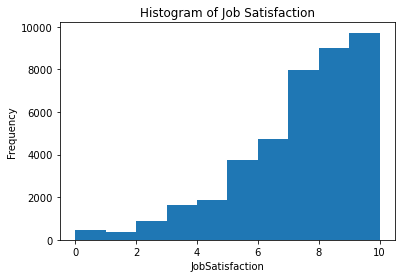

In [21]:
# Display the histogram of JobSatisfaction
new_df['JobSatisfaction'].plot(kind='hist',legend=False);

# Add a x-label to the plot
plt.xlabel('JobSatisfaction');

# Add a title to the plot
plt.title('Histogram of Job Satisfaction');

The distribution of `JobSatisfaction` is negatively skewed, so the missing values will be replaced with the mean like `StackOverflowSatisfaction`.

In [22]:
# Relpace the missing values of JobSatisfaction with its mean
new_df.JobSatisfaction.fillna(math.floor(new_df['JobSatisfaction'].mean()),inplace=True)

In [23]:
# Display the percentage of missing values in each feature of dataset
new_df.isnull().sum()/new_df.shape[0]

Professional                 0.0
FormalEducation              0.0
Country                      0.0
MajorUndergrad               0.0
StackOverflowSatisfaction    0.0
JobSatisfaction              0.0
dtype: float64

The missing values have been resolved.

## Question 1: 

In [24]:
# Doing groupby on FormalEducation to get the proportion of developer as dataframe for each type of the formal education
df_q1 = (new_df.groupby(['FormalEducation'])['Country'].count()/len(new_df)).sort_values(ascending=False).to_frame(name='Count')

# Replace the value of index
df_q1.rename(index={"Some college/university study without earning a bachelor's degree":"Incomplete bachelor's degree"},inplace=True)

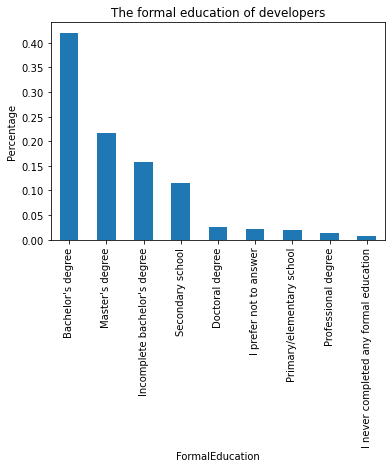

In [25]:
# Plot the percentage of developer in each type of formal education as a bar plot
df_q1.plot(kind="bar",legend=False);

# Add a y-label to the plot
plt.ylabel('Percentage');

# Add a title to the plot
plt.title('The formal education of developers');

# Save the plot as an image
plt.savefig('q1_plot.jpg', bbox_inches = 'tight')

Finding:<br>
We have found that the bachelor's degree has 40 per cent of developers and it followed by 20% for Master's degree. Thus, it relfects the need of programming skill on higher degrees. While the rest of formal education was low compared to the bachelor's degree like professional degree.

## Question2 :

In [26]:
# Filter users who works as Full-time job
df_full_time = new_df[new_df['MajorUndergrad'] != 'Computer science or software engineering']

# Define the dataset for the second question which cover only StackOverflowSatisfaction 
df_q2 = df_full_time['StackOverflowSatisfaction']

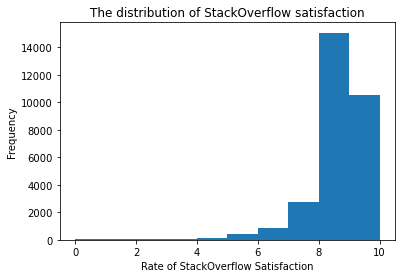

In [27]:
# Plot the distribution of StackOverflowSatisfaction as a histogram
df_q2.plot(kind='hist',legend=False);

# Add a x-label to the plot
plt.xlabel('Rate of StackOverflow Satisfaction');

# Add a title to the plot
plt.title('The distribution of StackOverflow satisfaction');

# Save the plot as an image
plt.savefig('q2_plot.jpg', bbox_inches = 'tight')

Finding:<br>
According to the histogram, the StackOverflow did a great job since the most of developers who has non-IT background are mostly satisfied.

## Question3:

In [28]:
# Doing groupby on Professional to get the proportion of developer as dataframe for each type of the professional
df_q3 = (new_df.groupby(['Professional'])['JobSatisfaction'].count()/len(new_df)).sort_values(ascending=False).to_frame(name='Count')

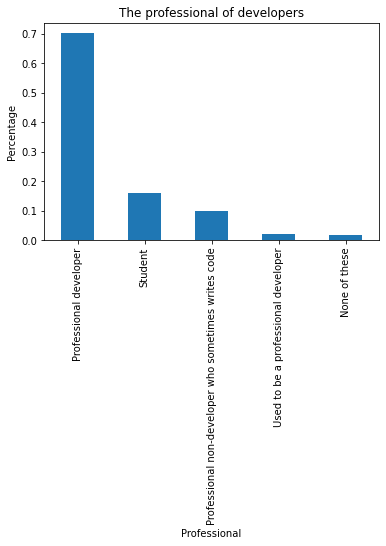

In [29]:
# Plot the percentage of developer in each type of professional as a bar plot
df_q3.plot(kind="bar",legend=False);

# Add a y-label to the plot
plt.ylabel('Percentage');

# Add a title to the plot
plt.title('The professional of developers');

# Save the plot as an image
plt.savefig('q3_plot.jpg', bbox_inches = 'tight')

Finding:<br>
The most professional of StackOverflow are developer and student so the goal of development this platform has been seen in professional of user.

In [30]:
# Save the dataframe as .csv file
new_df.to_csv('dataframe_project1.csv')